# Introduction

Toronto is the capital city of the province of Ontario. It has aproximatly 2,7 Milllion people living in it. It is the most populous city in Canada and the 4th most populous city in North America.
More than 50% of the residents of Toronto belong to a minority population group and over 200 distinct ethnic origins are presented among it's inhabitants. There are more than 160 spoken languages in the city, but English their primary language. 

# Business problem

In this project we will explore the best locations for a Japanese restaurent in Toronto. With more than 160 spoken languages in Toronto and many ethnical restaurents, it is an ideal place to look for opportunity to start a new restaurent. Japanese foods are very popular because it is a sign of status but also because the food is generally more healthy than what we see in regular Americas food habits. Toronto is a major transport hub in Canada and central America. Trains from New York come here as well as transits from the surrounding area. Toronto is also a major hub for transit to the US, which makes it ideal for tourism and work. This is why there is potential for great success for a restaurent owner. With any business, opening a restaurant requires consideration and dedication since it can quickly become more complicated than it seems at first glance. The location of the restaurant has a determining factor for success or failure, so we will try to answer the question: \
\
"Where should the investor setup a new Japanese restaurent for best success?"

# Data

In order to answer our question above we need to gather some data on Toronto and it's neighborhoods, boroughs, the latitudes and longitudes, existing restaurants, ratings and tips.


We will us data that has been collected(toronto_data.json) from wikipedia(https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')and geospatial_data.csv' which contains the latitude and longitude of the locations.

Data on restaurents will be obtained from the FourSquare API from the Python library Request.

# Methodology

Data collected from https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M has been merged with geospatial_data.csv and presented as toronto_data.json

FourSquare will be used to locate venues and then filter for Japanese restaurants. Ratings, tips and such will be counted and added to the dataframe

Data will be sorted based on rankings

Data will be visually assessed using graphs from Python libraries

# Problem Statement

1. What is the best location for Japanese food in Toronto
2. What neighborhood should we open a Japanese restaurant in order to have the best chance of success?
3. Where in Toronto would I go to have the best japanese food?


## We will start by importing libraries that we need in the project

In [1]:
import numpy as np # 

import pandas as pd #
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import requests

#from bs4 import BeautifulSoup
import os

!conda install -c conda-forge folium=0.5.0 --yes
import folium 

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim 
import requests 


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Solving environment: done

# All requested packages already installed.

Libraries imported.


## My variables

In [46]:
CLIENT_ID = 'WEIRUS00U3XRSG33QBTBLMNWRBEIIJMA0JV233VNAPYUZ3QK' # your Foursquare ID
CLIENT_SECRET = 'W5QFJYWCEMEORFESSOUDT1BBUKQCNKJDRW4CMR12WABZ0YYC' # your Foursquare Secret
ACCESS_TOKEN = '3M02QTVGUEKO3ZGAWWOLMXITDY0FLA0ZQGHXKYLWUUYAJJNQ' # your FourSquare Access Token
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)



Your credentails:
CLIENT_ID: WEIRUS00U3XRSG33QBTBLMNWRBEIIJMA0JV233VNAPYUZ3QK
CLIENT_SECRET:W5QFJYWCEMEORFESSOUDT1BBUKQCNKJDRW4CMR12WABZ0YYC


## To make things more simple we add some functions

In [5]:


def geo_location(address):
    geolocator = Nominatim(user_agent="foursquare_agent")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    return latitude,longitude


def get_venues(lat,lng):
    radius=400
    LIMIT=100
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
    results = requests.get(url).json()
    venue_data=results['response']['groups'][0]['items']
    venue_details=[]
    for row in venue_data:
        try:
            venue_id=row['venue']['id']
            venue_name=row['venue']['name']
            venue_category=row['venue']['categories'][0]['name']
            venue_details.append([venue_id,venue_name,venue_category])
        except KeyError:
            pass
    column_names=['ID','Name','Category']
    df_venues = pd.DataFrame(venue_details,columns=column_names)
    return df_venues


def get_venue_info(venue_id):
    url = 'https://api.foursquare.com/v2/venues/{}?&client_id={}&client_secret={}&v={}'.format(
            venue_id,
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION)
    results = requests.get(url).json()
    print(results)
    venue_data=results['response']['venue']
    venue_details=[]
    try:
        venue_id=venue_data['id']
        venue_name=venue_data['name']
        venue_likes=venue_data['likes']['count']
        venue_rating=venue_data['rating']
        venue_tips=venue_data['tips']['count']
        venue_details.append([venue_id,venue_name,venue_likes,venue_rating,venue_tips])
    except KeyError:
        pass
    column_names=['ID','Name','Likes','Rating','Tips']
    df_venue_info = pd.DataFrame(venue_details,columns=column_names)
    return df_venue_info

## We now read in the toronto data sheet as a json file

In [6]:
toronto_data = pd.read_json (r'toronto_data.json')

In [7]:
toronto_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,North York,Parkwoods,43.753259,-79.329656
1,North York,Victoria Village,43.725882,-79.315572
2,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [8]:
toronto_data.shape

(103, 4)

There are 103 neighborhoods in Toronto

## Initial Data Analysis

Now let's analyze our initial data. 

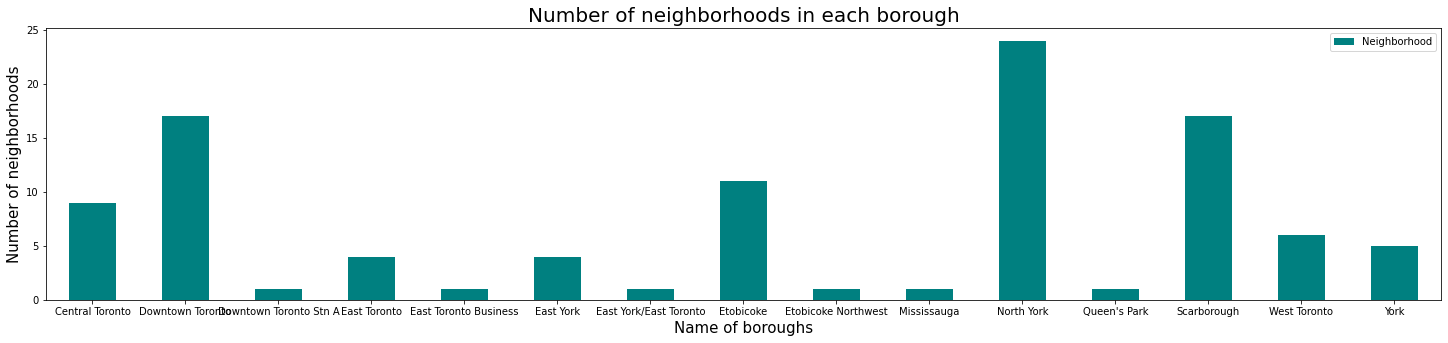

In [38]:
clr = "teal"
toronto_data.groupby('Borough')['Neighborhood'].count().plot.bar(figsize=(25,5), color=clr)
plt.title('Number of neighborhoods in each borough', fontsize = 20)
plt.xlabel('Name of boroughs', fontsize = 15)
plt.ylabel('Number of neighborhoods',fontsize = 15)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

We can see that North York has the most number of neighborhoods

### Let's analyze further and see how many Japanese restaurants there are in each neighborhood and borough. After it, graph the results.

In [10]:
column_names=['Borough', 'Neighborhood', 'ID','Name']
jap_restaurant_toronto=pd.DataFrame(columns=column_names)
count=1
for item in toronto_data.values.tolist():
    Borough, Neighborhood, Latitude, Longitude=item
    venues = get_venues(Latitude,Longitude)
    jap_restaurant=venues[venues['Category']=='Japanese Restaurant']
    for restaurant_detail in jap_restaurant.values.tolist():
        id, name , category=restaurant_detail
        jap_restaurant_toronto = jap_restaurant_toronto.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name
                                               }, ignore_index=True)
    count+=1

To ease our work, we will save the data from the function before in a csv file. This way we don't have to rerun the FourSquare API call if we need to review data.

In [11]:
jap_restaurant_toronto.to_csv('jap_restaurant_toronto.csv')

In [12]:
japanese_toronto = pd.read_csv('jap_restaurant_toronto.csv')
jap_restaurant_toronto.head()

,Borough,Neighborhood,ID,Name
0,Downtown Toronto,"Garden District, Ryerson",4b2bd898f964a52042bc24e3,Kinka Izakaya Original
1,Downtown Toronto,"Garden District, Ryerson",599cb69eb5461876d54ab713,Katsuya
2,North York,Glencairn,4fca732be4b07c8e3e198c27,Miyako Sushi Restaurant
3,Downtown Toronto,St. James Town,574ad72238fa943556d93b8e,Gyu-Kaku Japanese BBQ
4,Downtown Toronto,Central Bay Street,5773f01f498e98371390bdfd,Rolltation


In [13]:
jap_restaurant_toronto.shape

(32, 4)

We got 32 Japanese Restaurants across Toronto area. 

The next number of plots display restaurants per. borough,  and per. neighborhood.

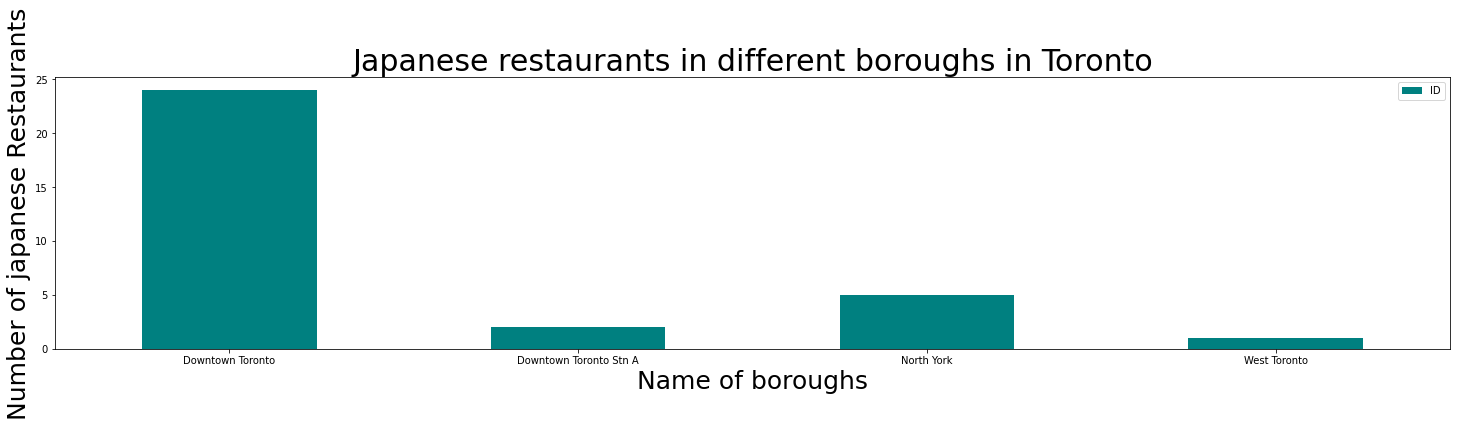

In [39]:
jap_restaurant_toronto.groupby('Borough')['ID'].count().plot.bar(figsize=(25,5), color=clr)
plt.title('Japanese restaurants in different boroughs in Toronto', fontsize = 30)
plt.xlabel('Name of boroughs', fontsize = 25)
plt.ylabel('Number of japanese Restaurants', fontsize=25)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

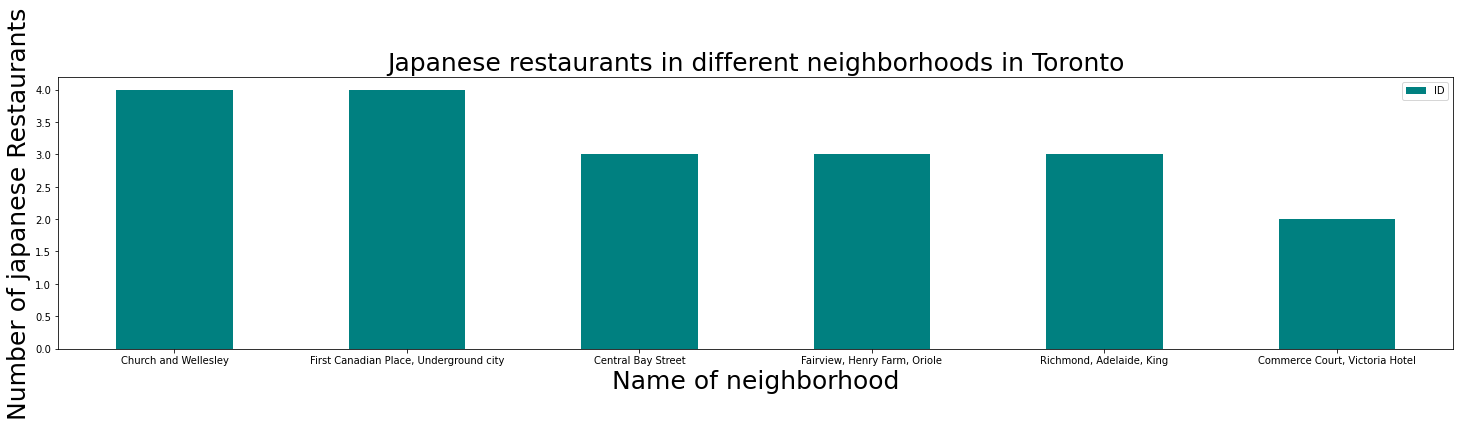

In [40]:
NumberOfNeighborhoods = 6
jap_restaurant_toronto.groupby('Neighborhood')['ID'].count().nlargest(NumberOfNeighborhoods).plot.bar(figsize=(25,5), color=clr)
plt.title('Japanese restaurants in different neighborhoods in Toronto', fontsize = 25)
plt.xlabel('Name of neighborhood', fontsize = 25)
plt.ylabel('Number of japanese Restaurants', fontsize=25)
plt.xticks(rotation = 'horizontal')
plt.legend()
plt.show()

We will be looking at Church and Wellesley since they have the most restaura

In [16]:
jap_restaurant_toronto[jap_restaurant_toronto['Neighborhood']=='Church and Wellesley']

,Borough,Neighborhood,ID,Name
28,Downtown Toronto,Church and Wellesley,4ad4c061f964a520abf720e3,Tokyo Grill
29,Downtown Toronto,Church and Wellesley,4c193c77838020a1e768e561,Kawa Sushi
30,Downtown Toronto,Church and Wellesley,4ae787b9f964a52020ac21e3,Tokyo Kitchen
31,Downtown Toronto,Church and Wellesley,4c531b60a724e21e029e3af4,Kokoni Izakaya


We have a total count of 4 restaurants in Church and Wellesley.

Now we will get the ranking of each restaurant for further analysis.

In [17]:
column_names=['Borough', 'Neighborhood', 'ID','Name','Likes','Rating','Tips']
japanese_rest_stats_toronto=pd.DataFrame(columns=column_names)
count=1
for row in jap_restaurant_toronto.values.tolist():
    Borough,Neighborhood,ID,Name=row
    try:
        venue_details=get_venue_info(ID)
        print(venue_details)
        id,name,likes,rating,tips=venue_details.values.tolist()[0]
    except IndexError:
        print('No data available for id=',ID)
        id,name,likes,rating,tips=[0]*5
    print('(',count,'/',len(jap_restaurant_toronto),')','processed')
    japanese_rest_stats_toronto = japanese_rest_stats_toronto.append({'Borough': Borough,
                                                'Neighborhood': Neighborhood, 
                                                'ID': id,
                                                'Name' : name,
                                                'Likes' : likes,
                                                'Rating' : rating,
                                                'Tips' : tips
                                               }, ignore_index=True)
    count+=1
japanese_rest_stats_toronto.tail()

{'meta': {'code': 200, 'requestId': '60a6334bcbad496236e9ba5c'}, 'response': {'venue': {'id': '4b2bd898f964a52042bc24e3', 'name': 'Kinka Izakaya Original', 'contact': {'phone': '4169770999', 'formattedPhone': '(416) 977-0999', 'twitter': 'kinkaizakayato', 'facebook': '160204064034815', 'facebookUsername': 'KinkaIzakayaToronto', 'facebookName': 'KINKA IZAKAYA TORONTO'}, 'location': {'address': '398 Church St', 'crossStreet': 'McGill Street', 'lat': 43.66059636632361, 'lng': -79.37889120754515, 'labeledLatLngs': [{'label': 'display', 'lat': 43.66059636632361, 'lng': -79.37889120754515}], 'postalCode': 'M5B 2A2', 'cc': 'CA', 'city': 'Toronto', 'state': 'ON', 'country': 'Canada', 'formattedAddress': ['398 Church St (McGill Street)', 'Toronto ON M5B 2A2', 'Canada']}, 'canonicalUrl': 'https://foursquare.com/v/kinka-izakaya-original/4b2bd898f964a52042bc24e3', 'categories': [{'id': '4bf58dd8d48988d111941735', 'name': 'Japanese Restaurant', 'pluralName': 'Japanese Restaurants', 'shortName': 'Ja

,Borough,Neighborhood,ID,Name,Likes,Rating,Tips
27,Downtown Toronto,"First Canadian Place, Underground city",5a4fdf56772fbc5e9fa73c7f,Chotto Matte,13,7.7,2
28,Downtown Toronto,Church and Wellesley,0,0,0,0.0,0
29,Downtown Toronto,Church and Wellesley,4c193c77838020a1e768e561,Kawa Sushi,27,7.7,13
30,Downtown Toronto,Church and Wellesley,4ae787b9f964a52020ac21e3,Tokyo Kitchen,20,7.4,21
31,Downtown Toronto,Church and Wellesley,4c531b60a724e21e029e3af4,Kokoni Izakaya,1,6.6,9


In [18]:
japanese_rest_stats_toronto.to_csv('japanese_rest_stats_toronto_csv.csv')

In [19]:
japanese_rest_stats_toronto.shape

(32, 7)

We got statistics for 32 Japanese Restaurants in Toronto. 

Let's check what values we have in our DataFrame

In [20]:
japanese_rest_stats_toronto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       32 non-null     object 
 1   Neighborhood  32 non-null     object 
 2   ID            32 non-null     object 
 3   Name          32 non-null     object 
 4   Likes         32 non-null     object 
 5   Rating        32 non-null     float64
 6   Tips          32 non-null     object 
dtypes: float64(1), object(6)
memory usage: 1.9+ KB


In order for us to be able to work with our data, we need to convert the data from object to float64.

In [21]:
japanese_rest_stats_toronto['Likes'] = japanese_rest_stats_toronto['Likes'].astype('float64')
japanese_rest_stats_toronto['Tips'] = japanese_rest_stats_toronto['Tips'].astype('float64')
japanese_rest_stats_toronto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Borough       32 non-null     object 
 1   Neighborhood  32 non-null     object 
 2   ID            32 non-null     object 
 3   Name          32 non-null     object 
 4   Likes         32 non-null     float64
 5   Rating        32 non-null     float64
 6   Tips          32 non-null     float64
dtypes: float64(3), object(4)
memory usage: 1.9+ KB


Now we have converted Likes and Tips to float so that we can better do our analysis. We will be looking at the idxmax values for Likes, Ratings and Tips to better get an overview of the data.

In [22]:
japanese_rest_stats_toronto.describe()

,Likes,Rating,Tips
count,32.000000,32.000000,32.000000
mean,47.062500,6.959375,24.718750
std,71.921524,2.355208,41.404561
min,0.000000,0.000000,0.000000
25%,9.000000,6.975000,2.750000
50%,20.500000,7.700000,10.000000
75%,53.000000,8.000000,30.500000
max,382.000000,8.800000,219.000000


In [23]:
japanese_rest_stats_toronto.iloc[japanese_rest_stats_toronto['Likes'].idxmax()]

Borough                 Downtown Toronto
Neighborhood    Garden District, Ryerson
ID              4b2bd898f964a52042bc24e3
Name              Kinka Izakaya Original
Likes                                382
Rating                               8.6
Tips                                 219
Name: 0, dtype: object

In [24]:
japanese_rest_stats_toronto.iloc[japanese_rest_stats_toronto['Rating'].idxmax()]

Borough                                          Downtown Toronto
Neighborhood    Harbourfront East, Union Station, Toronto Islands
ID                                       56201ed4498e7f700c462170
Name                                                         Miku
Likes                                                         142
Rating                                                        8.8
Tips                                                           47
Name: 13, dtype: object

In [25]:
japanese_rest_stats_toronto.iloc[japanese_rest_stats_toronto['Tips'].idxmax()]

Borough                 Downtown Toronto
Neighborhood    Garden District, Ryerson
ID              4b2bd898f964a52042bc24e3
Name              Kinka Izakaya Original
Likes                                382
Rating                               8.6
Tips                                 219
Name: 0, dtype: object

### Lets take this data and identify the neighborhoods with the maximum average rating of restaurants. This should give us an idea of how well the given neighborhood is rated.

In [26]:
toronto_neighborhood_stats=japanese_rest_stats_toronto.groupby('Neighborhood',as_index=False).mean()[['Neighborhood','Rating']]
toronto_neighborhood_stats.columns=['Neighborhood','Average Rating']
toronto_neighborhood_stats.sort_values(['Average Rating'],ascending=False).head(10)

,Neighborhood,Average Rating
8,"Harbourfront East, Union Station, Toronto Islands",8.80
11,St. James Town,8.60
14,"University of Toronto, Harbord",8.60
12,"St. James Town, Cabbagetown",8.40
9,"Little Portugal, Trinity",8.10
6,"Garden District, Ryerson",7.95
2,"Commerce Court, Victoria Hotel",7.85
3,Enclave of M5E,7.85
13,"Toronto Dominion Centre, Design Exchange",7.85
5,"First Canadian Place, Underground city",7.75


Top neighborhoods with the highest average ratings of Japanese restaurants are displayed above

We will make another analysis and look at the boroughs and their ratings

In [27]:
toronto_borough_stats=japanese_rest_stats_toronto.groupby('Borough',as_index=False).mean()[['Borough','Rating']]
toronto_borough_stats.columns=['Borough','Average Rating']
toronto_borough_stats.sort_values(['Average Rating'],ascending=False).head()

,Borough,Average Rating
3,West Toronto,8.10
1,Downtown Toronto Stn A,7.85
0,Downtown Toronto,7.45
2,North York,4.02


And above are the average ratings for the boroughs

## Let's visualize the results

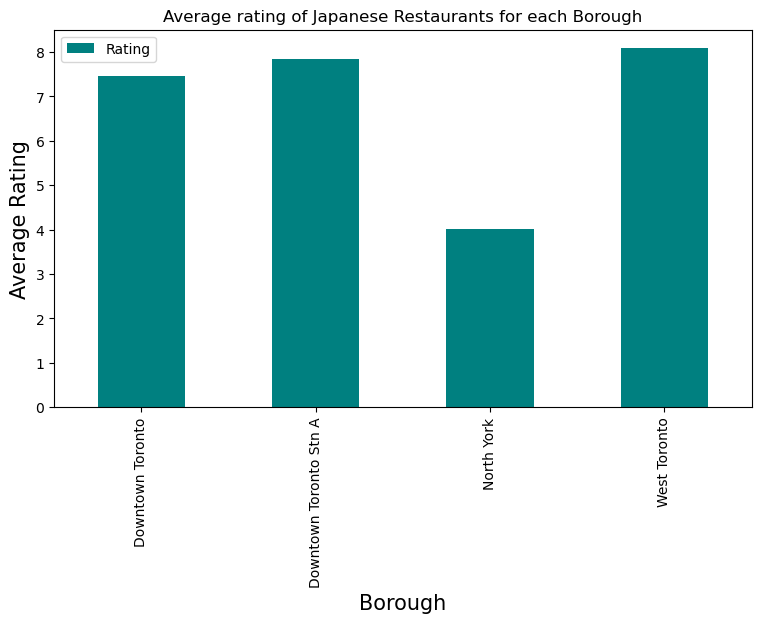

In [42]:
plt.figure(figsize=(9,5), dpi = 100)
plt.title('Average rating of Japanese Restaurants for each Borough')
plt.xlabel('Borough name', fontsize = 15)
plt.ylabel('Average Rating', fontsize=15)
japanese_rest_stats_toronto.groupby('Borough').mean()['Rating'].plot(kind='bar', color=clr)
plt.legend()
plt.show()

Since we want the highest ratings we will only consider rating values of 8.0 or above for all neighborhoods.

In [29]:
toronto_neighborhood_stats=toronto_neighborhood_stats[toronto_neighborhood_stats['Average Rating']>=8.0]
toronto_neighborhood_stats

,Neighborhood,Average Rating
8,"Harbourfront East, Union Station, Toronto Islands",8.8
9,"Little Portugal, Trinity",8.1
11,St. James Town,8.6
12,"St. James Town, Cabbagetown",8.4
14,"University of Toronto, Harbord",8.6


Now to make sense of the ratings we need to tie them to the different boroughs and neighborhoods. So we merge the 2 dataframes into 1.

In [30]:
toronto_neighborhood_stats=pd.merge(toronto_neighborhood_stats,toronto_data, on='Neighborhood')
toronto_neighborhood_stats=toronto_neighborhood_stats[['Borough','Neighborhood','Latitude','Longitude','Average Rating']]
toronto_neighborhood_stats

,Borough,Neighborhood,Latitude,Longitude,Average Rating
0,Downtown Toronto,"Harbourfront East, Union Station, Toronto Islands",43.640816,-79.381752,8.8
1,West Toronto,"Little Portugal, Trinity",43.647927,-79.419750,8.1
2,Downtown Toronto,St. James Town,43.651494,-79.375418,8.6
3,Downtown Toronto,"St. James Town, Cabbagetown",43.667967,-79.367675,8.4
4,Downtown Toronto,"University of Toronto, Harbord",43.662696,-79.400049,8.6


Now that we have a correlation between ratings and locations we can display it on a map.

In [31]:
toronto_map = folium.Map(location=geo_location('Toronto'), zoom_start=12)
rating = folium.map.FeatureGroup()

for lat, lng, in toronto_neighborhood_stats[['Latitude','Longitude']].values:
    rating.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # 
            color='red',
            fill=True,
            fill_color='green',
            fill_opacity=0.6
        )
    )

Let's add a new field to dataframe for labeling purpose

In [32]:
toronto_neighborhood_stats['Label']=toronto_neighborhood_stats['Neighborhood']+', '+toronto_neighborhood_stats['Borough']+'('+toronto_neighborhood_stats['Average Rating'].map(str)+')'
for lat, lng, label in toronto_neighborhood_stats[['Latitude','Longitude','Label']].values:
    folium.Marker([lat, lng], popup=label).add_to(toronto_map)        
toronto_map.add_child(rating)

## Results / Conclusion 
Downtown Toronto and West Toronto have the best rated Japanese restaurents on average. On the other hand, North York has the lowest average rating. Downtown Toronto has nearly 25 Japanese restaurants, whereas North York only has about 5. 
Downtown Toronto is the best place to get good Japanese food according to this analysis. To have best success for a good Japanese restaurant I would open one in North York, since the competition there is not that tough.